In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv('Datasets\Market_seg_ex.csv')

In [3]:
raw_data.head(20)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

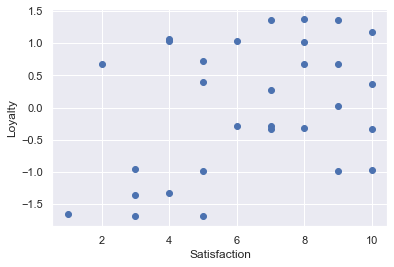

In [5]:
plt.scatter(raw_data['Satisfaction'],raw_data['Loyalty'] )
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [7]:
x = raw_data.copy()
x

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [10]:
kmns = KMeans(2)
kmns.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
clusters = x.copy()
clusters['Clusters'] = kmns.predict(x)
clusters

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

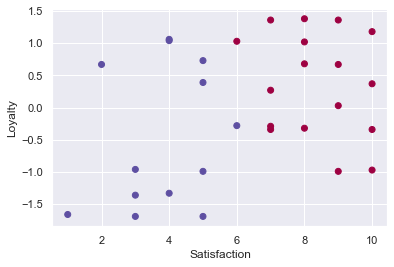

In [15]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'], c= clusters['Clusters'], cmap ='Spectral')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [18]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [25]:
wcss = []

for i in range(1,10):
    kmns = KMeans(i)
    kmns.fit(x_scaled)
    wcss_iter = kmns.inertia_
    wcss.append(wcss_iter)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.326631124753926,
 4.315662464700005,
 3.7523551963246464]

Text(0, 0.5, 'wcss')

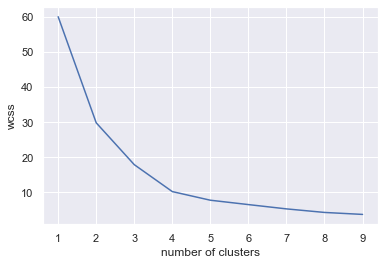

In [27]:
plt.plot(range(1,10),wcss )
plt.xlabel('number of clusters')
plt.ylabel('wcss')

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [29]:
kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,5
1,6,-0.28,4
2,5,-0.99,5
3,7,-0.29,4
4,4,1.06,6
5,1,-1.66,1
6,10,-0.97,7
7,8,-0.32,4
8,8,1.02,8
9,8,0.68,8


Text(0, 0.5, 'Loyalty')

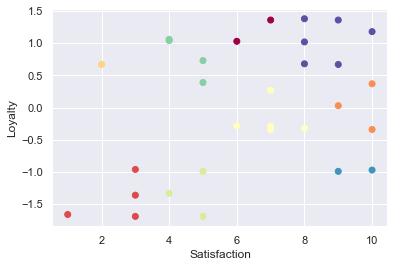

In [30]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='Spectral')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')